Examen 
Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: Examen1_ApellidoNombre, donde ApellidoNombre corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula sin acentos. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando Markdown.
No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.

In [0]:
%matplotlib inline 
 
import sympy as sym
import numpy as np
import matplotlib.pylab as plt
 
from sympy import init_printing; init_printing(use_latex='mathjax')
from IPython.display import display
from IPython.display import HTML
from scipy.integrate import odeint
 
from sympy import *
from scipy.optimize import linprog
 
 
from ipywidgets import *
 
Ley_Newton_enfriamiento='<iframe src=https://es.wikipedia.org/wiki/Ley_del_enfriamiento_de_Newton?useformat=mobile width=700 height=350></iframe>'
Torricelli='<iframe src=https://en.wikipedia.org/wiki/Torricelli%27s_law?useformat=mobile width=700 height=350></iframe>'
Caidalibre ='<iframe src=https://es.wikipedia.org/wiki/Ca%C3%ADda_libre?useformat=mobile width=700 height=350></iframe>'
 
sym.var('k t x')
 
T = sym.Function('T')

Problema 1 
¿Cuánto esperar para tomar el café?
Primero calentamos el agua a 80°𝐶. Posteriormente agregamos café al vaso con el agua caliente. Después realizamos la medición de la temperatura ambiente, la cual fue de 24°𝐶. Realiza las siguientes actividades: ]

(20 puntos) Simula el sistema en un tiempo de 0 a 120 unidades de tiempo con una constante de proporcionalidad 𝑘=−0.0565,
(15 puntos)
(10 puntos) Grafique la solución.
(5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a 30°𝐶?
(15 puntos)
(10 puntos) ¿Qué interpretación puedes decir para valores de 𝑘>0?
(5 puntos) Busca una constante de proporcionalidad 𝑘 en un rango ( de −0.2 a 0.2 con incremento de 0.01), para la cual el cafe tiene una temperatura menor de 30°𝐶 en un tiempo a 20 minutos.


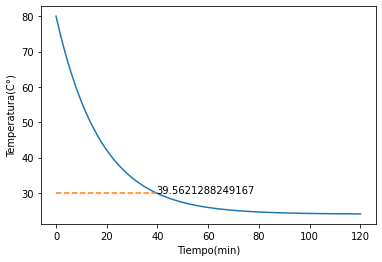

In [0]:
#respuesta a al problema 1, inciso 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
 
def f_T(k,t):
    return 56*np.exp(k*t) + 24
 
def f_t(k,T):
    return ln((T-24)/56)/k
 
k = -0.0565
t = np.linspace(0,120,120)
 
#print(f_t(k,35))
fig, axes=plt.subplots()
#axes.plot(k,sol,'--')
axes.plot(t,f_T(k,t))
axes.plot([0,f_t(k,29.99)],[29.99,29.99],'--')
axes.text(f_t(k,29.99),29.99,str(f_t(k,29.99)))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()

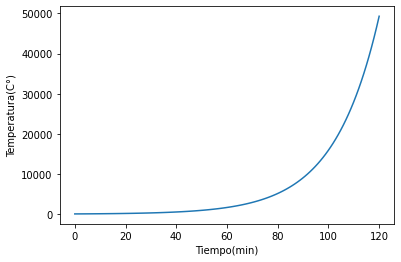

¿Qué interpetación puedes decir para valores de k>0: 
Puedo decir que el café nunca se enfriará, este continuara calentandose con el paso del tiempo.

Posibles Valores de k que cumplen con el requisito de una temperatura menor a 30C° después de 20 minutos:

temperatura(C°): 25.025675777769113 	Valor de K: -0.2
temperatura(C°): 25.259204151818864 	Valor de K: -0.18974358974358976
temperatura(C°): 25.545902838230806 	Valor de K: -0.1794871794871795
temperatura(C°): 25.897877783994026 	Valor de K: -0.16923076923076924
temperatura(C°): 26.329991247768376 	Valor de K: -0.158974358974359
temperatura(C°): 26.860489363678823 	Valor de K: -0.14871794871794874
temperatura(C°): 27.511772590372015 	Valor de K: -0.13846153846153847
temperatura(C°): 28.31134157780174 	Valor de K: -0.12820512820512822
temperatura(C°): 29.29295839128153 	Valor de K: -0.11794871794871796


In [0]:
#Respuetsa al problema 1, inciso 3
k = 0.0565
fig, axes=plt.subplots()
axes.plot(t,f_T(k,t))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()
print("¿Qué interpetación puedes decir para valores de k>0: \nPuedo decir que el café nunca se enfriará, este continuara calentandose con el paso del tiempo.")
k = np.linspace(-0.2,0.2,40)
 
print('\nPosibles Valores de k que cumplen con el requisito de una temperatura menor a 30C° después de 20 minutos:\n')
for x in k:
    if f_T(x,20) < 30:
        print('temperatura(C°):',f_T(x,20),'\tValor de K:',x)

Problema 2 
¿Cuánto esperar para comenzar a comer pastel?
Al sacar un pastel del horno, su temperatura es 280°𝐶. Después de 3 minutos, 2𝑂𝑂°𝐶. ¿En cuanto tiempo se enfriará hasta la temperatura ambiente de 28°𝐶? Realiza las siguientes actividades:

(20 puntos) Simula el sistema en un tiempo de 0 a 60 unidades de tiempo con una constante de proporcionalidad 𝑘=−0.14518,
(15 puntos)
(10 puntos) Grafique la solución.
(5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a 150°𝐶?
(15 puntos)
(10 puntos) ¿Qué interpretación puedes decir para valores de 𝑘>0?
(5 puntos) Busca una constante de proporcionalidad 𝑘 en un rango ( de −0.2 a 0.2 con incremento de 0.01), para la cual el pastel se puede comer a una temperatura menor a 50°𝐶 en un tiempo a 10 minutos.

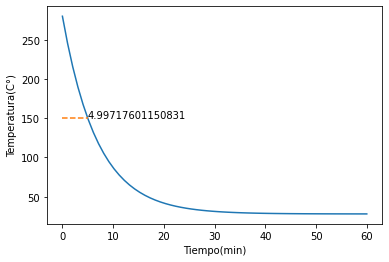

In [0]:
#respuesta a al problema 2, inciso 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

def fder(k,T):
    return k(T-28)

def f_T(k,t):
    return 252*np.exp(k*t) + 28

def f_t(k,T):
    return ln((T-28)/252)/k

k = -0.14518
t = np.linspace(0,60,60)

#print(f_t(k,35))
fig, axes=plt.subplots()
#axes.plot(k,sol,'--')
axes.plot(t,f_T(k,t))
axes.plot([0,f_t(k,149.99)],[149.99,149.99],'--')
axes.text(f_t(k,149.99),149.99,str(f_t(k,149.99)))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()

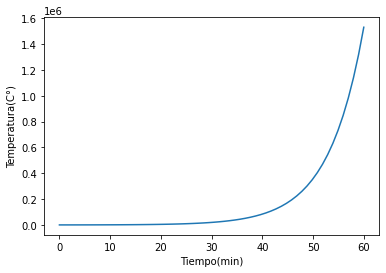

¿Qué interpetación puedes decir para valores de k>0: 
Puedo concluir que el pastel nunca se enfriará, este continuara calentandose con el paso del tiempo.

Posibles Valores de k que cumplen con el requisito de una temperatura menor a 50C° depués de 10 minutos:
No existen valores de k entre -0.2 y 0.2 que cumplan con los requisitos. Para un valor de k=0.2 la temperatura nos da de 62.10C°, siendo este valor la mejor opción que se acerca a los requisitos pedidos.


In [0]:
#Respuetsa al problema 2, inciso 3
k = 0.14518
fig, axes=plt.subplots()
axes.plot(t,f_T(k,t))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()
print("¿Qué interpetación puedes decir para valores de k>0: \nPuedo concluir que el pastel nunca se enfriará, este continuara calentandose con el paso del tiempo.")
k = np.linspace(-0.2,0.2,40)

print('\nPosibles Valores de k que cumplen con el requisito de una temperatura menor a 50C° depués de 10 minutos:')
for x in k:
    if f_T(x,10) <= 50:
        print('temperatura(C°):',f_T(x,10),'\tValor de K:',x)

print('No existen valores de k entre -0.2 y 0.2 que cumplan con los requisitos. Para un valor de k=0.2 la temperatura nos da de 62.10C°, siendo este valor la mejor opción que se acerca a los requisitos pedidos.')

Segundo punto.
Introducción al problema.
Caída libre
En la caída libre ideal, se desprecia la resistencia aerodinámica que presenta el aire al movimiento del cuerpo, analizando lo que pasaría en el vacío. En esas condiciones, la aceleración que adquiriría el cuerpo sería debida exclusivamente a la gravedad, siendo independiente de su masa.

𝑑𝑠𝑑𝑡𝑑𝑣𝑑𝑡==𝑣−𝑔
O visto el sistema en forma canónica

𝑥˙1𝑥˙2==𝑥2−𝑔

Problema 3 
Deja caer una pelota
Desde un edificio de altura de 314 metros se deja caer una pelota, que tarda 8 segundos en llegar al piso. ¿con que velocidad impacta la pelota contra el piso?

(20 puntos) Simula el sistema en un tiempo de 0 a 8 unidades de tiempo con una constante de gravedad 𝑔=−9.8,
(15 puntos)
(10 puntos) Grafique la solución.
(5 puntos) Supoga que cada unidad de tiempo corresponde a un segundo. ¿En que tiempo aproximadamente la pelota esta a la mitad del edificio?
(15 puntos)
(10 puntos) ¿Qué interpretación puedes decir para una posicion inicial de 314𝑚 y una velocidad de 30𝑚/𝑠 ?
(5 puntos) ¿Que altura aproximadamente tendra en 10𝑠 para el incisio anterior?

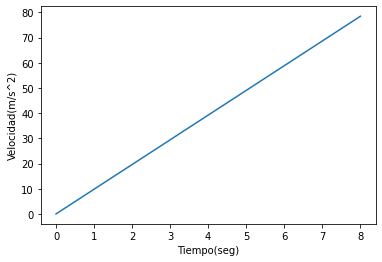

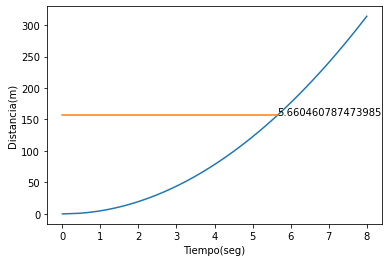

In [0]:
#Inciso 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

def velocity(g,h):
    return np.sqrt(2*g*h)

def time(g,h):
    return np.sqrt((2*h)/g)


g= 9.8
h=np.linspace(0,314,314)
vo= 30
t = np.linspace(0,8,8)
tf = np.linspace(0,10,10)

fig, axes=plt.subplots()
axes.plot(time(g,h),velocity(g,h))
plt.xlabel('Tiempo(seg)')
plt.ylabel('Velocidad(m/s^2)')
plt.show()

fig, axes=plt.subplots()
axes.plot(time(g,h),h)
axes.plot([0,time(g,157)],[157,157])
axes.text(time(g,157),157,str(time(g,157)))
plt.xlabel('Tiempo(seg)')
plt.ylabel('Distancia(m)')
plt.show()

In [0]:
# Solucion opcion 3
print("¿Qué interpretación puedes decir para una posicion inicial de 314𝑚 y una velocidad de 30𝑚/𝑠? \nEn ese caso se tendria un tiro vertical para considerar una altura y velocidad inicial distintas a cero.")

print("\n¿Que altura aproximadamente tendra en 10𝑠 para el incisio anterior?")
h= 314+(vo*10)-(g*10**2)/2
print(h,"m")


¿Qué interpretación puedes decir para una posicion inicial de 314𝑚 y una velocidad de 30𝑚/𝑠? 
En ese caso se tendria un tiro vertical para considerar una altura y velocidad inicial distintas a cero.

¿Que altura aproximadamente tendra en 10𝑠 para el incisio anterior?
123.99999999999994 m


Tercer punto.
Introducción al problema.
Drenado de un tanque (Ley de Torricelli)
En hidrodinámica, la ley de Torricelli establece que la velocidad 𝑣 de flujo de salida de agua a través de un orificio plano ubicado en la parte inferior de un tanque lleno hasta una altura ℎ será igual a la velocidad que un cuerpo (en este caso una gota de agua) adquiriría en caída libre desde una altura ℎ; es decir, 𝑣=2𝑔ℎ⎯⎯⎯⎯⎯⎯√, donde 𝑔 es la aceleración debida a la gravedad.

Suponga que un tanque lleno de agua puede drenar mediante un orificio bajo la influencia de la gravedad. Deseamos encontrar la altura ℎ del agua restante en el tanque en el tiempo 𝑡.

Si el área del orificio es 𝐴ℎ (en 𝑚2) y la velocidad del agua que sale del tanque es 𝑣=2𝑔ℎ⎯⎯⎯⎯⎯⎯√ (en m/s), entonces el volumen del agua que abandona el tanque por segundo es 𝐴ℎ2𝑔ℎ⎯⎯⎯⎯⎯⎯√ (en 𝑚3/s). De este modo, si 𝑉(𝑡) indica el volumen del agua que hay en el tanque en el tiempo 𝑡, la ecuación diferencial deseada para la altura del agua en el tiempo t:

𝑑ℎ𝑑𝑡=−𝐴ℎ𝐴𝑤2𝑔ℎ⎯⎯⎯⎯⎯⎯√
Donde 𝐴𝑤 (en 𝑚2) representa el área constante de la superficie superior del agua.

Observe que aquí ignoramos la posibilidad de fricción en el orificio, la cual puede ocasionar una reducción en la velocidad del flujo en dicho lugar

Problema 4 
Drenado de un tanque
Concidere un cilindro circular con un área constante de 𝐴𝑤=5𝑚2, en la parte inferior contiene un orificio de área 𝐴ℎ=1𝑚2 el cual podemos estar regulando la salida del liquido. En el interior del tanque se encuentra un liquido el cual tiene una altura inicial en el tiempo 0 de ℎ(0)=10𝑚. Realiza las siguientes actividades:

(20 puntos) Simula el sistema en un tiempo de 0 a 6.5 unidades de tiempo,
(15 puntos)
(10 puntos) Grafique la solución.
(5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la altura del liquido alcanza una altura de ℎ=2𝑚?
(15 puntos)
(10 puntos) ¿Qué interpretación puedes decir si el signo de la ecuación fuera positivo?
(5 puntos) ¿Si el área del orificio 𝐴ℎ es menor a 1𝑚2 que implicaria? Realiza una simulacion y grafica la solución para un orificio de 𝐴ℎ=.5𝑚

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


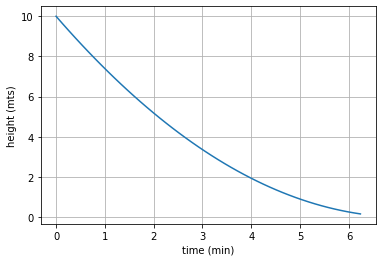

Con las condiciones dadas, podemos deducir que la altura será de 2 metros cuando el tiempo sea aproximadamente 4 minutos.


In [0]:
#Respuesta inciso 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
def tanque(Ah, Aw, h0):
    g = 9.81
    def velocidad(h,t):
        return -(Ah/Aw)*np.sqrt(2*g*h)
    t = np.linspace(0,6.5)
    h_t = odeint(velocidad,h0,t)
    
    plt.plot(t,h_t)
    plt.xlabel('time (min)')
    plt.ylabel('height (mts)')
    plt.grid()
    plt.show()
tanque(1,5,10)
print("Con las condiciones dadas, podemos deducir que la altura será de 2 metros cuando el tiempo sea aproximadamente 4 minutos.")




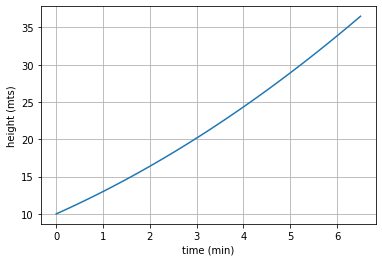

Al cambiar el signo de la función del flujo volumétrico podemos interpretar que en vez de perder volumen a través del tiempo se estará ganando volumen.


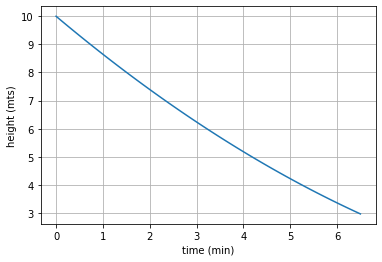

Al hacer el horificio más pequeño podemos observar que el vaciado del tanque será más lento.


In [0]:
#Respuesta inciso 3
def tanquePositivo(Ah, Aw, h0):
    g = 9.81
    def velocidad(h,t):
        return (Ah/Aw)*np.sqrt(2*g*h)
    t = np.linspace(0,6.5)
    h_t = odeint(velocidad,h0,t)
    
    plt.plot(t,h_t)
    plt.xlabel('time (min)')
    plt.ylabel('height (mts)')
    plt.grid()
    plt.show()
tanquePositivo(1,5,10)
print("Al cambiar el signo de la función del flujo volumétrico podemos interpretar que en vez de perder volumen a través del tiempo se estará ganando volumen.")

tanque(0.5,5,10)
print("Al hacer el horificio más pequeño podemos observar que el vaciado del tanque será más lento.")


Problema 5 
Modelo poblacional
Simula la siguiente ecuación, y supoga que cada unidad de tiempo corresponde a un minuto.

𝑑𝑠𝑑𝑡=0.05𝑠(𝑠20−1)(1−𝑠100)
(20 puntos) Simula el sistema en un tiempo de 0 a 200 unidades de tiempo, con la condición inicial 𝑠(0)=21
(15 puntos)
(10 puntos) Grafique la solución.
(5 puntos) ¿En que tiempo aproximadamente la poblacion alcanza su maxima capacidad?
(15 puntos)
(5 puntos) ¿Cual es la capacidad de soporte de este modelo poblacional?
(10 puntos) ¿Que pasa con una condición inicial menor (s(0)=21) ? ¿Y con una condición mayor a la capacidad de soporte?

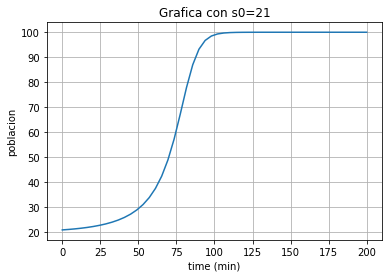

Viendo la gráfica podemos observar que la población alcanza su máxima capacidad aproximadamente a los 105 minutos.


In [0]:
#Respuesta inciso 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
def poblacion(s0,title):
    def crecimiento(s,t):
        return 0.05*s*((s/20)-1)*(1-(s/100))
    t = np.linspace(0,200)
    s_t = odeint(crecimiento,s0,t)
    
    plt.plot(t,s_t)
    plt.xlabel('time (min)')
    plt.ylabel('poblacion')
    plt.title(title)
    plt.grid()
    plt.show()
poblacion(21,'Grafica con s0=21')
print("Viendo la gráfica podemos observar que la población alcanza su máxima capacidad aproximadamente a los 105 minutos.")

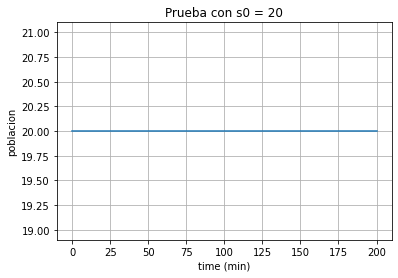

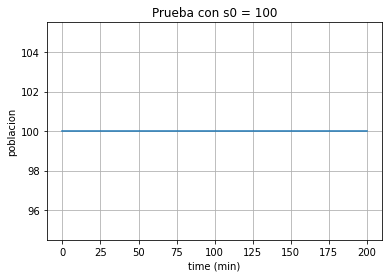

Observando la función de creciemiento y haciendo las simulaciones en 20 y 100 nos damos cuenta que el rango de la población que se debería de manejar es entre 20 y 100, dando una capacidad de 80


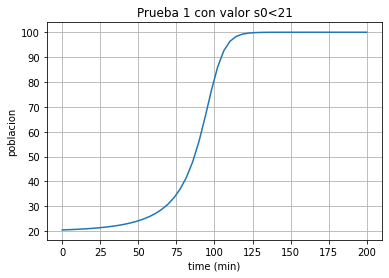

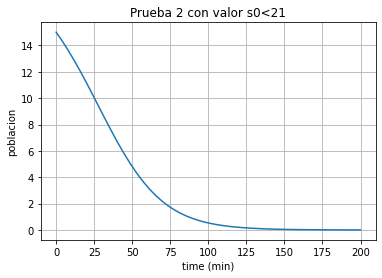

Al dar un valor inicial s0<21 se incrementa el tiempo para llegar a la capacidad máxima, pero si reducimos s0<20 
nuestro sistema falla


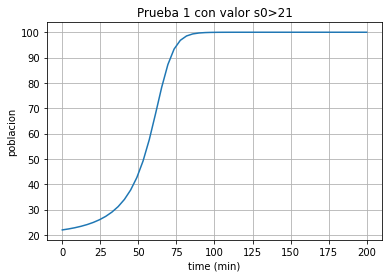

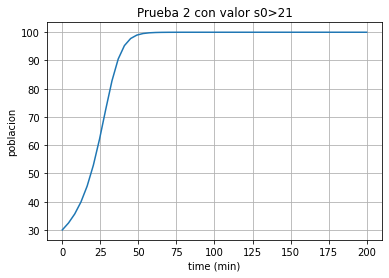

Si incrementamos s0>21 se disminuye el tiempo para llegar a la capacidad máxima, si sobrepasamos s0>100 
nuestro sistema falla


In [0]:
#Respuesta inciso 3
poblacion(20, 'Prueba con s0 = 20')
poblacion(100, 'Prueba con s0 = 100')
print("Observando la función de creciemiento y haciendo las simulaciones en 20 y 100 nos damos cuenta que el rango de la población que se debería de manejar es entre 20 y 100, dando una capacidad de 80")
poblacion(20.5, 'Prueba 1 con valor s0<21')
poblacion(15, 'Prueba 2 con valor s0<21')
print('Al dar un valor inicial s0<21 se incrementa el tiempo para llegar a la capacidad máxima, pero si reducimos s0<20 \nnuestro sistema falla')
poblacion(22, 'Prueba 1 con valor s0>21')
poblacion(30, 'Prueba 2 con valor s0>21')
print('Si incrementamos s0>21 se disminuye el tiempo para llegar a la capacidad máxima, si sobrepasamos s0>100 \nnuestro sistema falla')

Problema 6 (estabilizar el sistema)
Diseña una función 𝑢 diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> ∞.

𝑑𝑠𝑑𝑡=0.06𝑢
(20 puntos) Simula el sistema en un tiempo de 0 a 800 unidades de tiempo, con la condición inicial 𝑠(0)=10
(15 puntos)
(15 puntos) Grafique la solución.
(15 puntos)
(15 puntos) Escriba la ecuación de 𝑢 utilizada

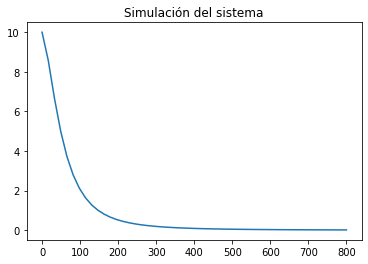

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

def ds(s0):
    def cambio(s,t):
        u=-0.027*s*np.sqrt(s*t*0.5)
        return 0.06*u
    t = np.linspace(0,800)
    s_t = odeint(cambio,s0,t)
    
    plt.plot(t,s_t)
    plt.title('Simulación del sistema')
    plt.show()
    
ds(10)

Problema 7 
Diseña una función 𝑢 diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> ∞.

𝑑𝑥𝑑𝑡=2𝑥2+0.06𝑢
(20 puntos) Simula el sistema con la condición inicial 𝑥(0)=10
(15 puntos)
(15 puntos) Grafique la solución.
(15 puntos)
(15 puntos) Escriba la ecuación de 𝑢 utilizada

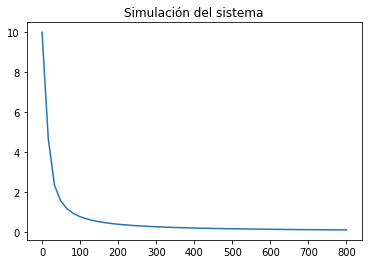

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

def dx(x0):
    def cambio(x,t):
        u=-40*x*np.sqrt(x*t*0.5)
        return 2*x*np.exp(2)+0.06*u
    t = np.linspace(0,800)
    x_t = odeint(cambio,x0,t)
    
    plt.plot(t,x_t)
    plt.title('Simulación del sistema')
    plt.show()
    
dx(10)

Problema 8 (seguimiento de trayectorias) 
Diseña una función 𝑢 diferente de 0, para que el siguiente sistema siga una trayectoria.

𝑑𝑥𝑑𝑡=2𝑥2+0.06𝑢
(20 puntos) Simula el sistema con la condición inicial 𝑥(0)=10
(15 puntos)
(15 puntos) Grafique la solución siguiendo la funcion de referencia 𝑥𝑟𝑒𝑓=𝑠𝑖𝑛(𝑡)
(15 puntos)
(15 puntos) Escriba la ecuación de 𝑢 utilizada

Problema 9 
Una empresa de transportes gestiona una flota de 60 carros de tres modelos diferentes.

Los tipo X generan una media diaria de $15,000 pesos. y recorren diariamente una media de 400 kilómetros.

Los tipo Black generan diariamente una media de $10,000 pesos y recorren 300 kilómetros.

Los tipo SUV generan diariamente $5,000 pesos y recorren 100 km. de media.

Diariamente los carros de la empresa transportan un total de $475 mil pesos y recorren 12500 km. entre todos.

¿Cuántos carros gestiona la empresa de cada modelo?

In [0]:
import numpy as np

a=np.array([[1,1,1],[15000,10000,5000],[400,300,100]])
b=np.array([60, 475000,12500])
x=np.linalg.solve(a,b)

#print(x)

print("X:", round(x[0]))
print("Black:", round(x[1]))
print("SUV:", round(x[2]))

X: 5.0
Black: 25.0
SUV: 30.0


Problema 10 
Ace Novelty recibió un pedido del Magic World Amusement Park de 900 pandas gigantes, 1200 perros San Bernardo y 2000 pájaros grandes. La dirección Ace decidió que 500 pandas, 800 perros y 1300 pájaros pueden ser fabricados en su planta de Los Ángeles, y el resto del pedido podría realizarse en la planta de Seattle.

Cada panda requiere 1.5 metros cuadradas de felpa, 30 metros cúbicos de relleno y 5 piezas de adorno; cada perro requiere 2 metros cuadradas de felpa, 35 metros cúbicos de relleno y 8 piezas de adorno, y cada pájaro requiere 2.5 metros cuadrados de felpa, 25 metros cúbicos de relleno y 15 piezas de adorno. La felpa cuesta $4.50 por metro cuadrado, el relleno cuesta $0.20 por metros cúbico y las piezas de adorno cuestan $0.25 por unidad.

a. Calcule la cantidad de cada tipo de material que se debe comprar para cada planta.

b. ¿Cuál es el costo total de materiales empleados en cada planta y el costo total de los materiales usados por Ace Novelty para cubrir el pedido?



Problema 10 
Aproxima la función exponencial con n=20

𝑒𝑥=∑𝑛=020𝑥𝑛𝑛!

In [0]:
import math
a=0
x=2

for i in range(20):
    a=a+(x**i)/math.factorial(i)
    
print("Tomando x=2 \n")
print("e^2 =", math.e**x)
print("Aproximacion con sumatoria:", a)

Tomando x=2 

e^2 = 7.3890560989306495
Aproximacion con sumatoria: 7.3890560989301735


Problema 11 
Construir una cisterna rectangular
Se va a construir una cisterna rectangular con base y tapa cuadradas para almacenar 12000𝑝𝑖𝑒𝑠3 de agua. Si el concreto para construir la base y los lados tiene un costo de 100 por 𝑝𝑖𝑒2 y el material para construir la tapa cuesta 200 por 𝑝𝑖𝑒2

¿cuáles son las dimensiones de la cisterna que minimizan el costo de su construcción?

¿Qué se quiere en el problema?

Determinar las dimensiones de la cisterna que minimizan el costo de su construcción. Suponiendo que las dimensiones de la cisterna son: 𝑥 pies el lado de la base cuadrada y ℎ pies su altura.

¿Cuál es el costo de su construcción?



Para encontrar las dimensiones (𝑥 & ℎ) que minimizan el costo de su construcción se necesita la expresión del costo de la cisterna. Usamos la tabla siguiente:



El costo total de la contrucción de la cisterna es:

𝐶=300𝑥2+400𝑥ℎ pesos
En el problema aparece la siguiente restricción: el volumen de la cisterna debe ser igual a 12000𝑝𝑖𝑒𝑠3, es decir, que 𝑥2ℎ=12000.

Tenemos pues:

Una función 𝐶=300𝑥2+400𝑥ℎ y una ecuación 𝑥2ℎ=12000. De la ecuación despejamos una de las variables (la que más convenga) para sustituirla en la función. Conviene despejar ℎ.

Problema 12 
Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente.

¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?

Problema 13 
Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €.

¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

Problema 14 
El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [0]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt

banking = pd.read_csv('banking.csv')
print(banking.columns)

FileNotFoundError: ignored

In [0]:
banking.head()

In [0]:
banking.rename(columns={'y':'willRespond'},inplace=True)

In [0]:
banking.shape

In [0]:
banking.columns

In [0]:
banking.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [0]:
banking.head()

In [0]:
banking.columns

In [0]:
labels=banking.willRespond.values
labels

In [0]:
le=preprocessing.LabelEncoder()

In [0]:
le.fit(banking.poutcome)

In [0]:
banking.head(2)

In [0]:
#se les asigna u valor numérico a cada uno de los posibles estados para cada columna
banking.poutcome=le.transform(banking.poutcome)

In [0]:
banking.head()

In [0]:
banking.housing = le.fit_transform(banking.housing)
banking.loan=le.fit_transform(banking.loan)
banking.head(2)

In [0]:
banking.job=le.fit_transform(banking.job)
banking.marital=le.fit_transform(banking.marital)
banking.education=le.fit_transform(banking.education)
banking.head()

In [0]:
plt.hist(banking.age)

In [0]:
banking['age'].describe()

In [0]:
plt.scatter(banking.emp_var_rate,banking.age)

In [0]:
banking.apply(lambda x: len(x.unique()))

In [0]:
banking.shape, banking['willRespond'].shape

In [0]:
features = banking[['age','job','marital','education','housing','loan','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed' ]]

In [0]:
features.head()

In [0]:
pd.get_dummies(features)

In [0]:
banking_dummies = pd.get_dummies(features,)
banking_dummies.head()

In [0]:
banking_dummies.shape

In [0]:
banking_dummies.isna()

In [0]:
banking_dummies.isna().any()

In [0]:
banking_dummies_train = banking_dummies.dropna()
banking_dummies_train.isna().any()

In [0]:
labels_train = labels[banking_dummies_train.index]
labels_train

In [0]:
banking_dummies_train.head()

In [0]:
# LogisticRegression

In [0]:
model = LogisticRegression(solver='lbfgs',max_iter=1000)

In [0]:
model.fit(banking_dummies_train,labels_train)

In [0]:
labels_train #real

In [0]:
model.predict(banking_dummies_train) # Predict

In [0]:
true_predict = sum(model.predict(banking_dummies_train) ==  labels_train)
true_predict

In [0]:
true_ratio = sum(model.predict(banking_dummies_train) ==  labels_train) / (len(labels_train))
true_ratio

In [0]:
len(labels_train)

In [0]:
true_predict/len(labels_train)

In [0]:
print("logistic regression score: %f" % model.score(banking_dummies_train, labels_train))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_data, test_data, train_labels, test_labels = train_test_split(banking_dummies_train, labels_train,
                                                                    random_state=0,test_size=0.33)

In [0]:
train_data.shape,test_data.shape

In [0]:
model = LogisticRegression(solver='lbfgs',max_iter=500).fit(train_data,train_labels)

print("Logistic regression score: %f" % model.score(test_data,test_labels))

In [0]:
#labels = titanic.survived.values

features = banking[['age','job','marital','education',
                    'housing','loan','poutcome','emp_var_rate',
                    'cons_price_idx','cons_conf_idx','euribor3m','nr_employed' ]]

features = features.dropna()
labels = labels[features.index]

train_data, test_data, train_labels, test_labels = train_test_split(features, labels_train,
                                                                    random_state=0,test_size=0.33)

model = LogisticRegression(solver="lbfgs",max_iter=500).fit(train_data, train_labels)
print("logistic regression score: %f" % model.score(test_data, test_labels))

In [0]:
test_data.head()

In [0]:
model.predict(test_data)